Opening the Data Sources

In [112]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
import scipy as stats
import scipy
import seaborn as sns
import zipfile
import sqlite3
import math

In [113]:
movie_gross_data = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
print(movie_gross_data)

                                            title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700.0   

     foreign_gross  year  


In [114]:
#Finding missing values
movie_gross_data.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [115]:
#tmdb_movie_data = pd.read_csv("zippedData/tmdb.movies.csv.gz")
movie_budgets_data = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
movie_info_data = pd.read_csv("zippedData/rt.movie_info.tsv.gz",sep="\t")

In [116]:
#movie_reviews_data = pd.read_csv("zippedData/rt.reviews.tsv.gz",sep="\t")

In [117]:
#tmdb_movie_data.isnull().sum()
movie_budgets_data.isnull().sum()
print(movie_budgets_data)
#missing a lot of values
#movie_info_data.isnull().sum()

      id  release_date                                        movie  \
0      1  Dec 18, 2009                                       Avatar   
1      2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2      3   Jun 7, 2019                                 Dark Phoenix   
3      4   May 1, 2015                      Avengers: Age of Ultron   
4      5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   
...   ..           ...                                          ...   
5777  78  Dec 31, 2018                                       Red 11   
5778  79   Apr 2, 1999                                    Following   
5779  80  Jul 13, 2005                Return to the Land of Wonders   
5780  81  Sep 29, 2015                         A Plague So Pleasant   
5781  82   Aug 5, 2005                            My Date With Drew   

     production_budget domestic_gross worldwide_gross  
0         $425,000,000   $760,507,625  $2,776,345,279  
1         $410,600,000   $241,063,8

In [118]:
def dejar_solo_cifras(txt):
  return "".join(c for c in txt if c.isdigit())
w_gross = movie_budgets_data['worldwide_gross'].map(dejar_solo_cifras)
p_budget = movie_budgets_data['production_budget'].map(dejar_solo_cifras)
movie_budgets_data['w_gross'] = w_gross.astype(float)
movie_budgets_data['p_budget'] = p_budget.astype(float)
movie_budgets_data = movie_budgets_data.assign(gain = movie_budgets_data['w_gross']*100/ movie_budgets_data['p_budget'])
movie_budgets_data


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,w_gross,p_budget,gain
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2.776345e+09,425000000.0,653.257713
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",1.045664e+09,410600000.0,254.667286
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",1.497624e+08,350000000.0,42.789243
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",1.403014e+09,330600000.0,424.384139
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",1.316722e+09,317000000.0,415.369636
...,...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,0.000000e+00,7000.0,0.000000
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",2.404950e+05,6000.0,4008.250000
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",1.338000e+03,5000.0,26.760000
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,0.000000e+00,1400.0,0.000000


In [119]:
#stadistics plotting gains 
mean_gain = movie_budgets_data['gain'].mean()
max_gain = movie_budgets_data['gain'].max()
desv =  movie_budgets_data['gain'].std()
print('The average of gains is:'+ str(mean_gain))
print('The maximum of gains is:'+ str(max_gain))

The average of gains is:480.01613657949645
The maximum of gains is:180000.0


In [120]:
#stadistics relating gains vs studio or genre
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [121]:
plt.style.use('ggplot')

<AxesSubplot:title={'center':'Revenue per movie'}, xlabel='Movies', ylabel='Revenue percentage'>

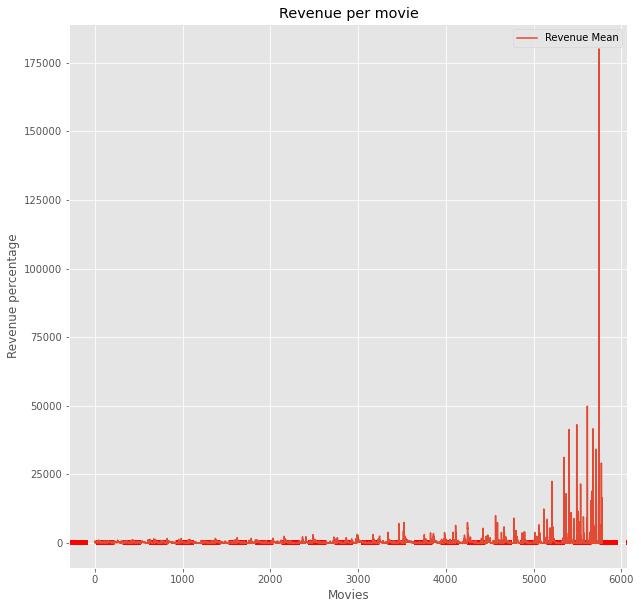

In [122]:
plt.xlabel("Movies")
plt.ylabel("Revenue percentage")
plt.title("Revenue per movie")
plt.axhline(y=mean_gain, color="red", linewidth=5, linestyle="--")
plt.legend(
    labels=["Revenue Mean"],
    fontsize="large"
);
movie_budgets_data['gain'].plot()

In [123]:
#delete quartiles for plot

In [124]:
merged_gross_budget = pd.merge(movie_gross_data, movie_budgets_data, how = "inner", left_on= "title", right_on= "movie")
data_for_analysis = merged_gross_budget[["title",'studio','gain']]
studio_gain = data_for_analysis.groupby(['studio']).mean()
s_mean = studio_gain['gain'].mean()
s_max = studio_gain.max()
studio_gain

,gain
studio,
3D,330.304060
A24,424.242218
ALP,11.245996
ATO,18.177488
Affirm,403.844830
...,...
WB,324.805506
WB (NL),1749.593358
WHE,5.470657


<AxesSubplot:title={'center':'Average Revenue per studio'}, xlabel='studio', ylabel='Revenue percentage'>

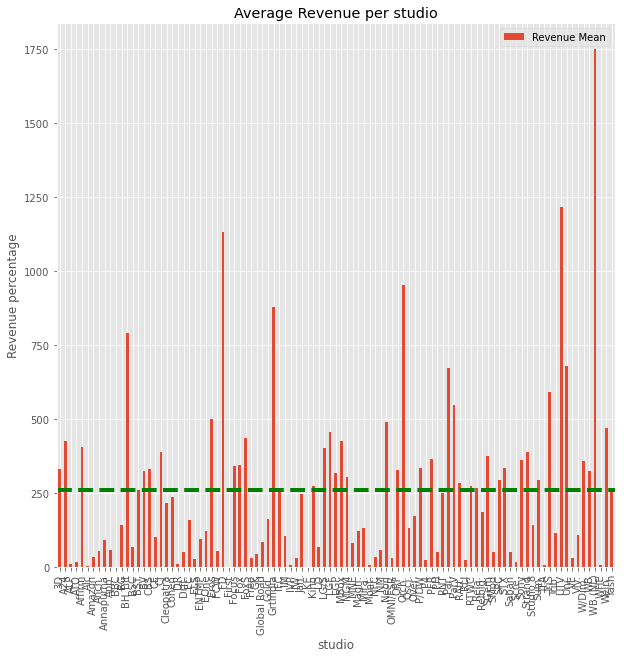

In [125]:
#studio_gain.plot.bar( rot=90)
plt.xlabel("Studio")
plt.ylabel("Revenue percentage")
plt.title("Average Revenue per studio")
plt.axhline(y=s_mean, color="green", linewidth=4, linestyle="--")
plt.legend(
    labels=["Revenue Mean"],
    fontsize="large"
);
studio_gain['gain'].plot.bar()

In [ ]:
#maximum average studio gain
studio_gain[studio_gain['gain']==studio_gain['gain'].max()]

In [ ]:
#Select only values above the average
def highest_avrg(data):
    filtered_data = []
    for x in studio_gain['gain'] :
        if x > s_mean :
            print(x)
    return filtered_data

In [128]:
with zipfile.ZipFile("zippedData/im.db.zip", "r") as zObject:
        zObject.extractall()

In [129]:
conn = sqlite3.connect("im.db")
cur = conn.cursor()

In [130]:
pd.read_sql("""
SELECT *
FROM directors
;
""", conn).head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [ ]:
df = pd.read_sql("""SELECT * FROM movie_ratings, movie_basics ;""", conn)
df

In [ ]:
df.isnull().sum()